In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import requests
from io import StringIO
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore") #supress warnings for readability

In [2]:
#import csv
orig_url = "https://drive.google.com/file/d/1aVcCTw1vy-66D7ShjXACjV4hE4CDknDL/view?usp=sharing"
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_r = StringIO(url)
stats_adv = pd.read_csv(csv_r)
#replace A with space
stats_adv['Name'] = stats_adv['Name'].str.replace('Â',"")
stats_adv['Name'] = stats_adv['Name'].str.replace('Alexis DÃaz',"Alexis Diaz")
stats_adv.head()

,Name,Age,Tm,BA,OBP,SLG,OPS,BAbip,HR%,SO%,BB%,EV,HardH%,LD%,GB%,FB%,GB/FB,WPA,cWPA,RE24
0,Cory Abbott,26,WSN,0.239,0.343,0.500,0.843,0.248,5.60%,20.80%,11.60%,90.3,43.60%,16.30%,28.40%,43.30%,0.40,-0.7,0.00%,-6.0
1,Albert Abreu,26,TOT,0.243,0.351,0.382,0.733,0.291,2.90%,22.10%,12.80%,87.1,36.40%,25.70%,52.30%,18.30%,1.12,-0.5,-0.10%,-2.8
2,Albert Abreu,26,TEX,0.138,0.405,0.345,0.750,0.111,4.80%,21.40%,28.60%,87.8,35.00%,20.00%,55.00%,25.00%,1.22,0.0,0.00%,-1.8
3,Albert Abreu,26,KCR,0.353,0.500,0.588,1.088,0.385,4.60%,13.60%,18.20%,89.9,42.90%,21.40%,64.30%,14.30%,1.80,0.0,0.00%,-0.6
4,Albert Abreu,26,NYY,0.255,0.299,0.357,0.656,0.319,1.90%,24.10%,5.60%,86.4,35.60%,28.00%,49.30%,17.30%,1.00,-0.5,-0.10%,-0.3


In [14]:
#import advanced stats csv
orig_url = "https://drive.google.com/file/d/1QQle4eS5BGTNWhcxjIRusJTBwjhdwyVD/view?usp=sharing"
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
stats = pd.read_csv(csv_raw)
#replace A with space
stats['Name'] = stats['Name'].str.replace('Â',"")
stats['Name'] = stats['Name'].str.replace('Alexis DÃaz',"Alexis Diaz")
stats

,ï»¿Rk,Name,Age,Tm,Lg,W,L,W-L%,ERA,G,...,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W
0,1,Cory Abbott,26,WSN,NL,0,5,0.000,5.25,16,...,2,216,75.0,6.36,1.438,8.3,2.3,4.7,8.4,1.80
1,2,Albert Abreu,26,TOT,AL,2,2,0.500,3.26,33,...,6,172,124.0,4.77,1.474,8.1,1.2,5.1,8.8,1.73
2,3,Albert Abreu,26,TEX,AL,0,0,NaN,3.12,7,...,0,42,132.0,8.54,1.846,4.2,2.1,12.5,9.3,0.75
3,4,Albert Abreu,26,KCR,AL,0,0,NaN,4.15,4,...,1,22,107.0,8.19,2.308,12.5,2.1,8.3,6.2,0.75
4,5,Albert Abreu,26,NYY,AL,2,2,0.500,3.16,22,...,5,108,125.0,2.92,1.208,8.8,0.7,2.1,9.1,4.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Ian Kennedy,37,ARI,NL,4,7,0.364,5.36,57,...,3,232,75.0,5.58,1.570,10.2,2.0,3.9,7.9,2.00
496,497,Ray Kerr*,27,SDP,NL,0,0,NaN,9.00,7,...,1,21,45.0,6.91,1.400,5.4,1.8,7.2,5.4,0.75
497,498,Clayton Kershaw*,34,LAD,NL,12,3,0.800,2.28,22,...,0,493,184.0,2.57,0.942,6.8,0.7,1.6,9.8,5.96
498,499,Dallas Keuchel*,34,TOT,MLB,2,9,0.182,9.20,14,...,3,303,44.0,5.52,2.060,13.9,1.6,4.6,6.7,1.45


In [4]:
#filtering pitchers that pitched for multiple teams

In [5]:
#Selecting columns we need
st = stats[['Name','Tm','IP','ERA+']]
sta = stats_adv[['Name','Tm','HardH%']]
print(st)
print(sta)

#filtering pitchers that pitched for multiple teams
#if name appears multiple times, use the one with the most IP
st = st.groupby(['Name','Tm']).max().reset_index()
#print(st)

                 Name   Tm     IP   ERA+
0         Cory Abbott  WSN   48.0   75.0
1        Albert Abreu  TOT   38.2  124.0
2        Albert Abreu  TEX    8.2  132.0
3        Albert Abreu  KCR    4.1  107.0
4        Albert Abreu  NYY   25.2  125.0
..                ...  ...    ...    ...
495       Ian Kennedy  ARI   50.1   75.0
496         Ray Kerr*  SDP    5.0   45.0
497  Clayton Kershaw*  LAD  126.1  184.0
498   Dallas Keuchel*  TOT   60.2   44.0
499   Dallas Keuchel*  TOT   42.0   45.0

[500 rows x 4 columns]
                Name   Tm  HardH%
0        Cory Abbott  WSN  43.60%
1       Albert Abreu  TOT  36.40%
2       Albert Abreu  TEX  35.00%
3       Albert Abreu  KCR  42.90%
4       Albert Abreu  NYY  35.60%
..               ...  ...     ...
494  Dallas Keuchel*  TOT  35.80%
495  Dallas Keuchel*  CHW  34.10%
496  Dallas Keuchel*  ARI  46.90%
497  Dallas Keuchel*  TEX  41.00%
498   Yusei Kikuchi*  TOR  48.30%

[499 rows x 3 columns]


In [6]:
stats_adv.isnull().sum()


Name      0
Age       0
Tm        0
BA        0
OBP       0
SLG       0
OPS       0
BAbip     0
HR%       0
SO%       0
BB%       0
EV        0
HardH%    0
LD%       0
GB%       0
FB%       0
GB/FB     5
WPA       0
cWPA      0
RE24      0
dtype: int64

In [7]:
stats.isnull().sum()

ï»¿Rk      0
Name       0
Age        0
Tm         0
Lg         0
W          0
L          0
W-L%     147
ERA        0
G          0
GS         0
GF         0
CG         0
SHO        0
SV         0
IP         0
H          0
R          0
ER         0
HR         0
BB         0
IBB        0
SO         0
HBP        0
BK         0
WP         0
BF         0
ERA+      35
FIP        0
WHIP       0
H9         0
HR9        0
BB9        0
SO9        0
SO/W      33
dtype: int64

In [8]:
#delete rows with null values
st=st.dropna()
sta=sta.dropna()

In [9]:
#Combine the two dataframes 
merged_inner = pd.merge(left=st, right=sta, left_on='Name', right_on='Name')

merged_inner = merged_inner.drop(['Tm_y'], axis=1)

#if name appears multiple times, use the one with the most IP
grouped = merged_inner.groupby(['Name', 'Tm_x']).agg({'IP': 'sum'})

#filter players that played for multiple teams
max_teams = grouped.groupby('Name').idxmax()
merged_inner = merged_inner.groupby(['Name']).max().reset_index()

#delete rows with IP less than 50   
merged_inner = merged_inner[merged_inner['IP'] > 50]

#convert hardh% to float
merged_inner['HardH%'] = merged_inner['HardH%'].str.rstrip('%').astype('float') / 100.0

#sort by players with ERA+ under 150 and HardH% under 40
merged_inner[merged_inner['ERA+'] < 150].sort_values(by=['HardH%'], ascending=False)

merged_inner['Name'] = merged_inner['Name'].str.replace('Ã',"i")

#delete rasiel iglesias because he is an outlier
merged_inner = merged_inner[merged_inner['Name'] != 'Raisel Iglesias']

# size of the output 
merged_inner.shape
merged_inner


,Name,Tm_x,IP,ERA+,HardH%
1,Aaron Ashby*,MIL,107.1,89.0,0.347
4,Aaron Civale,CLE,97.0,78.0,0.405
6,Adam Cimber,TOR,70.2,139.0,0.388
8,Adrian Houser,MIL,102.2,83.0,0.418
11,Alexis Di­az,CIN,63.2,244.0,0.331
...,...,...,...,...,...
366,Yu Darvish,SDP,194.2,121.0,0.373
367,Zach Davies,ARI,134.1,98.0,0.347
368,Zach Eflin,PHI,75.2,101.0,0.313
371,Zack Greinke,KCR,137.0,111.0,0.396


In [10]:
mg=merged_inner.sort_values(["ERA+","HardH%"],ascending=[False,True])
#delete the row with rasiel iglesias because he is an outlier
mg = mg.drop([mg.index[0]])

<AxesSubplot: >

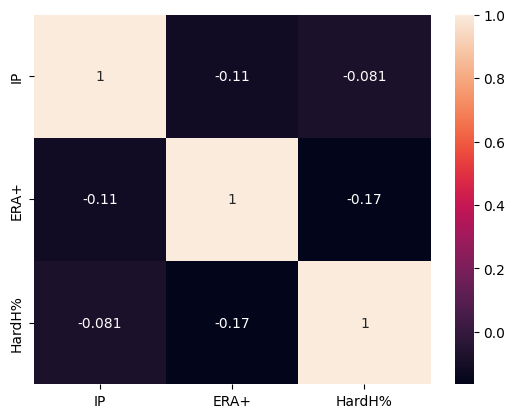

In [11]:

#correllation matrix between ERA+ and HardH%
merged_inner.corr()
#heatmap
sns.heatmap(merged_inner.corr(), annot=True)

Text(0.5, 1.0, 'ERA+ vs. HardH%')

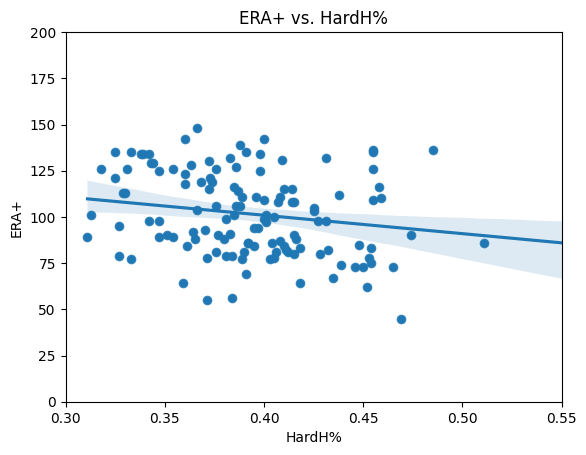

In [12]:
#visual showing players with ERA+ over 150 and HardH% over 45
sns.scatterplot(x='HardH%', y='ERA+', data=merged_inner[merged_inner['ERA+'] < 150])

# set the x and y limits
plt.ylim(0, 200)  
plt.xlim(0.30,0.55)


#add trendline
sns.regplot(x='HardH%', y='ERA+', data=merged_inner[merged_inner['ERA+'] < 150])

plt.title('ERA+ vs. HardH%')



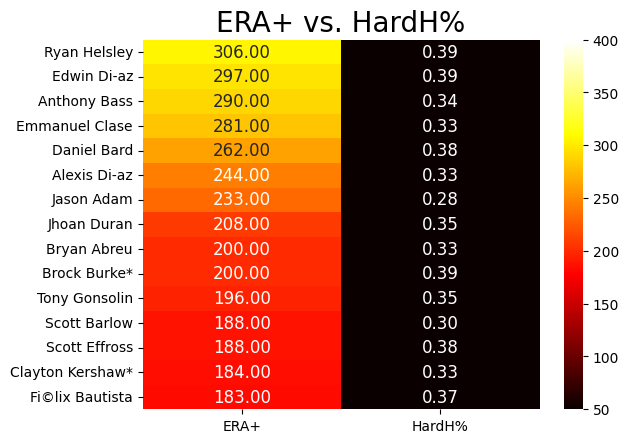

In [13]:

hp = sns.heatmap(mg.head(15)[['ERA+','HardH%']], annot=True, annot_kws={'size': 12},fmt=".2f",vmin=50, vmax=400, cmap='hot')
hp.set_yticklabels(mg['Name'].head(15), rotation=0)
hp.set_title('ERA+ vs. HardH%', fontsize=20)
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5d6c6614-8a04-4fb8-a24c-860b351869bd' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>